

```
Amazon Fine Food Reviews - NLP Portfolio Project

Objective: Use Natural Language Processing (NLP) techniques to extract insights from customer reviews of food products sold on Amazon.

Dataset: [Amazon Fine Food Reviews - Kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)  

Tools: Python, Pandas, NLTK/SpaCy, Matplotlib/Seaborn, WordCloud


Project Goals:
- Clean and preprocess review text
- Perform tokenization
- Explore word usage and sentiment
- Build a sentiment classifier (Optional)
- Visualize insights for stakeholders
```



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Adjust path based on where you saved it in your drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Reviews.csv'
df = pd.read_csv(file_path)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# Data Cleaning, dropping and retaining only neccessary columns for this analysis

df = df[['ProductId', 'UserId', 'Score', 'Time', 'Summary', 'Text',
         'HelpfulnessNumerator', 'HelpfulnessDenominator']]

In [7]:
# Dropping all the null

df.dropna(inplace=True)

In [8]:
# Converting text & Summary content to lowercase
df['Text'] = df['Text'].str.lower()
df['Summary'] = df['Summary'].str.lower()

In [9]:
df.head()

,ProductId,UserId,Score,Time,Summary,Text,HelpfulnessNumerator,HelpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,1,1
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,3,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600,great taffy,great taffy at a great price. there was a wid...,0,0


In [10]:
# Convert the current UNIX timestamp in our dataset to datetime
df['ReviewTime'] = pd.to_datetime(df['Time'], unit='s')

In [11]:
# Creating additional features to help with the analysis

df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))
df['summary_length'] = df['Summary'].apply(lambda x: len(str(x).split()))
df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)
df['sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral'))


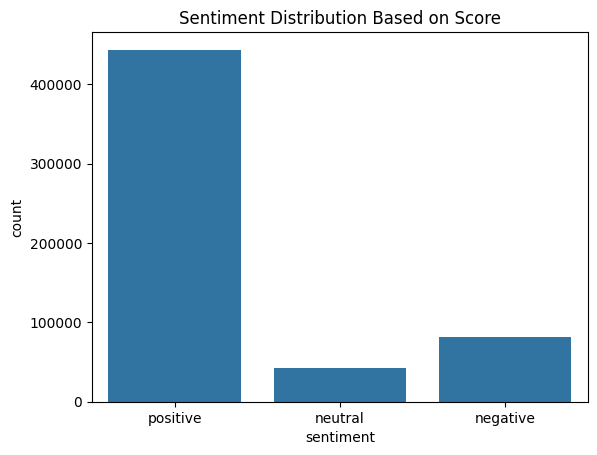

In [12]:
#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Conducting sentiment distribution
sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution Based on Score")
plt.show()

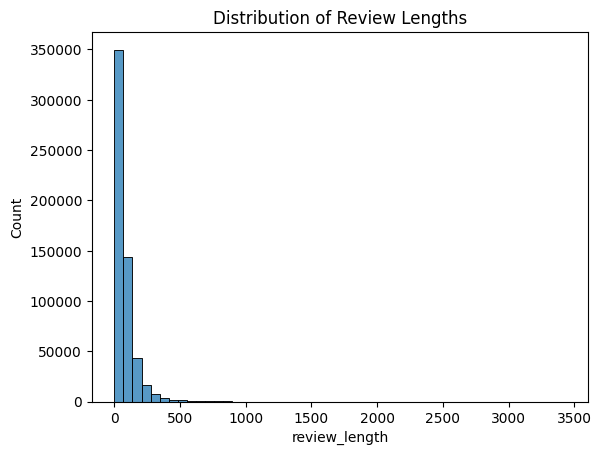

In [13]:
# We also want to know the length of our review
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.show()

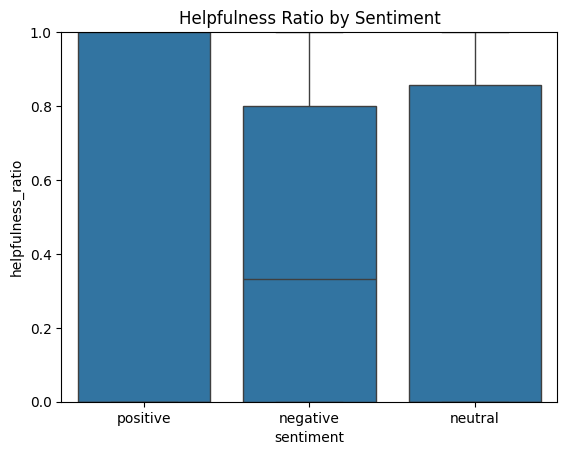

In [14]:
# Helpfulness Ratio
sns.boxplot(data=df, x='sentiment', y='helpfulness_ratio')
plt.title("Helpfulness Ratio by Sentiment")
plt.ylim(0, 1)
plt.show()

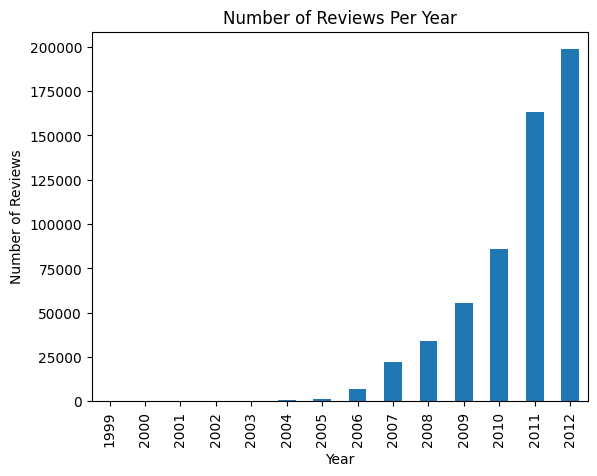

In [15]:
# Time Series: Reviews Over Time
df['ReviewTime'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

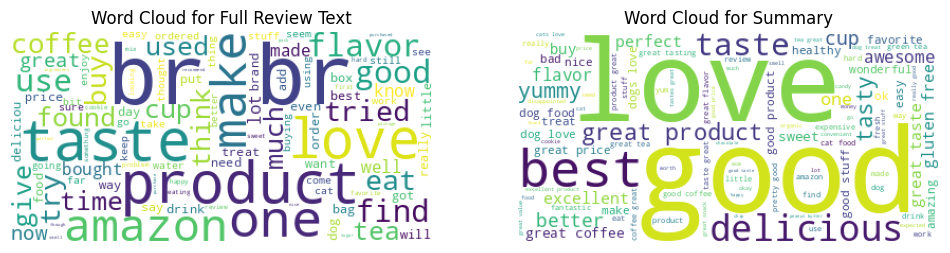

In [16]:
from wordcloud import WordCloud

text_words = " ".join(df['Text'].dropna().astype(str).tolist())
summary_words = " ".join(df['Summary'].dropna().astype(str).tolist())

# Generate Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(max_words=100, background_color='white').generate(text_words))
plt.axis('off')
plt.title("Word Cloud for Full Review Text")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(max_words=100, background_color='white').generate(summary_words))
plt.axis('off')
plt.title("Word Cloud for Summary")

plt.show()

In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
# Applying tokenization to our text column
df['tokens'] = df['Text'].apply(word_tokenize)

In [26]:
# Viewing a sample of our tokenized text
df[['Text', 'tokens']].head()

,Text,tokens
0,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,..."
2,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro..."
3,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr..."
4,great taffy at a great price. there was a wid...,"[great, taffy, at, a, great, price, ., there, ..."


In [29]:
# Let's remove stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from token list
df['tokens_clean'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

df[['tokens', 'tokens_clean']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens,tokens_clean
0,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea..."
2,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, ., light, ,, p..."
3,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, ., wide, assortme..."


In [30]:
# Remove Punctuation and Special Characters - Token preprocessing

import string
punctuation = set(string.punctuation)
df['tokens_clean'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# Check the cleaned tokens
df[['tokens', 'tokens_clean']].head()

,tokens,tokens_clean
0,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea..."
2,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy..."
3,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, at, a, great, price, ., there, ...","[great, taffy, great, price, wide, assortment,..."


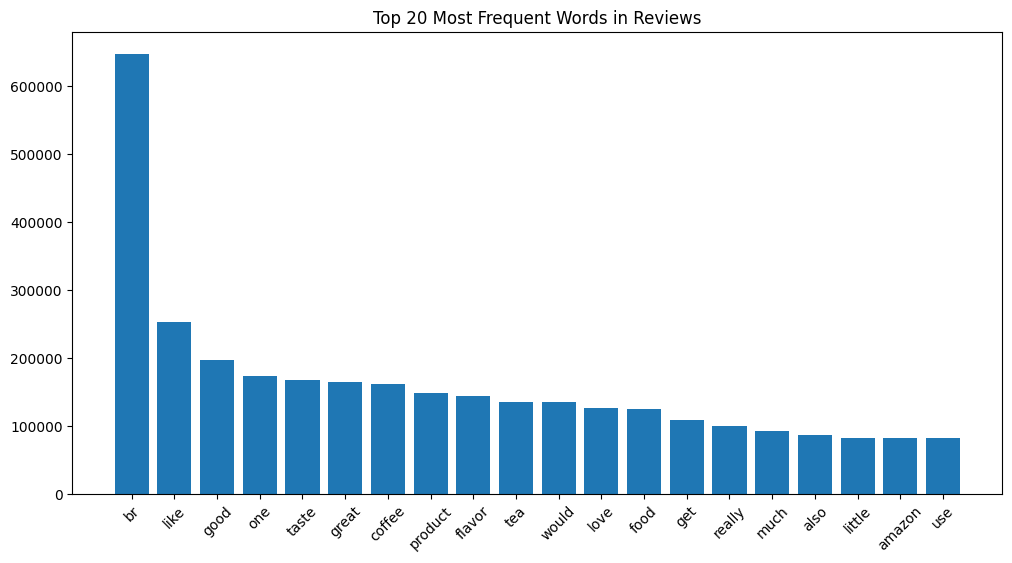

In [31]:
# Let's visualize the most frequent words across all reviews
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all tokens
all_words = [word for tokens in df['tokens_clean'] for word in tokens]

# Count word frequency
word_freq = Counter(all_words)

# Most common 20 words
common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()

In [33]:
# Conducting a sentiment classification
df['sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral'))

df['sentiment']

,sentiment
0,positive
1,negative
2,positive
3,negative
4,positive
...,...
568449,positive
568450,negative
568451,positive
568452,positive
